In [25]:
# Dependencies
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

# OpenWeatherMap API key
from config import api_key

# Import citipy for cities based on lat/long values
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [27]:
#Save config information
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build patrial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url


In [28]:
# Set lists to hold response info
city_data = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial counts
counter = 0
result_counter = 1

print("Beginning Data Retrieval\n------------------------------")

# Loop through data to create dataframe
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter > 49:
            counter = 1
            result_counter += 1
            city_data.append(city)
        else:
            counter += 1
            city_data.append(city)
        print(f"Processing Record {counter} of Set {result_counter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | bukama
City not found. Skipping...
Processing Record 8 of Set 1 | cedar city
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | fuxin
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | celestun
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | acari
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | hithadhoo
Processing Rec

Processing Record 33 of Set 4 | contamana
Processing Record 34 of Set 4 | ukiah
Processing Record 35 of Set 4 | marawi
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | roebourne
Processing Record 38 of Set 4 | zhangye
Processing Record 39 of Set 4 | mglin
Processing Record 40 of Set 4 | rio branco
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | poum
City not found. Skipping...
Processing Record 43 of Set 4 | abeche
Processing Record 44 of Set 4 | khorinsk
Processing Record 45 of Set 4 | uyuni
City not found. Skipping...
Processing Record 46 of Set 4 | panino
Processing Record 47 of Set 4 | tripoli
Processing Record 48 of Set 4 | praya
Processing Record 49 of Set 4 | elko
Processing Record 50 of Set 4 | abu samrah
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | gushikawa
Processing Record 3 of Set 5 | darnah
City not found. Skipping...
Processing Record 4 of Set 5 | vanavara
Processing Record 5 of Set 5 | eyl
Processing Re

City not found. Skipping...
Processing Record 19 of Set 8 | north bend
Processing Record 20 of Set 8 | cockburn town
Processing Record 21 of Set 8 | cape coast
Processing Record 22 of Set 8 | qasigiannguit
Processing Record 23 of Set 8 | namibe
Processing Record 24 of Set 8 | ilulissat
Processing Record 25 of Set 8 | rafraf
Processing Record 26 of Set 8 | seara
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | cherat
Processing Record 29 of Set 8 | iringa
Processing Record 30 of Set 8 | buraydah
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | ak-dovurak
Processing Record 33 of Set 8 | aginskoye
Processing Record 34 of Set 8 | ipora
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | dublin
City not found. Skipping...
Processing Record 39 of Set 8 | istok
Processing Record 40 of

Processing Record 3 of Set 12 | margate
Processing Record 4 of Set 12 | pordim
Processing Record 5 of Set 12 | marsaxlokk
City not found. Skipping...
Processing Record 6 of Set 12 | mandiana
Processing Record 7 of Set 12 | capreol
City not found. Skipping...
Processing Record 8 of Set 12 | ketchikan
Processing Record 9 of Set 12 | gazanjyk
Processing Record 10 of Set 12 | itarana
Processing Record 11 of Set 12 | kaoma
------------------------------
Data Retrieval Complete
------------------------------


In [29]:
# Create dictionary of lists for DataFrame
weather_info={
    'City':city_data,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds,
    'Country':countries,
    'Date':dates
}

In [30]:
# Get weather data into DataFrame
weather_df = pd.DataFrame(weather_info)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paamiut,61.9940,-49.6678,-1.46,85,20,2.71,GL,1612724530
1,punta arenas,8.9897,125.3400,23.80,92,100,0.60,PH,1612724530
2,nanortalik,60.1432,-45.2371,-0.45,89,74,6.29,GL,1612724224
3,mahebourg,-20.4081,57.7000,27.00,78,75,4.63,MU,1612724531
4,busselton,-33.6500,115.3333,17.22,99,98,0.45,AU,1612724532


In [31]:
# Save .csv of retrieved data
weather_df.to_csv("Output/weather.csv", index=False, header=True)

In [32]:
# Check count on DataFrame (must be at least 500)
weather_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [33]:
# Get all info on DataFrame
# Inspect to see if there are any humidities >100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.665671,23.290651,10.152299,70.918004,54.907308,3.926435,1.612725e+09
std,31.839389,86.816830,17.368789,21.310302,41.338956,2.818304,2.225793e+02
min,-54.800000,-179.166700,-42.000000,3.000000,0.000000,0.140000,1.612724e+09
25%,-3.736100,-49.667800,-1.140000,60.000000,3.000000,1.950000,1.612725e+09
50%,25.533300,25.136100,15.560000,77.000000,75.000000,3.160000,1.612725e+09
75%,47.804300,95.683300,24.890000,86.000000,99.000000,5.140000,1.612725e+09
max,78.218600,178.416700,35.400000,100.000000,100.000000,21.610000,1.612725e+09


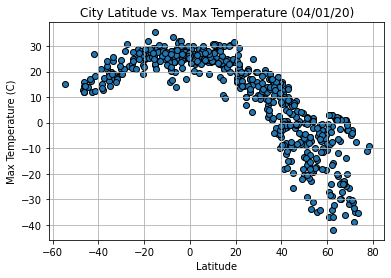

In [34]:
# Plot the data using a scatter plot
# Latitude vs. Max Temp
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_temp.png")
plt.show()


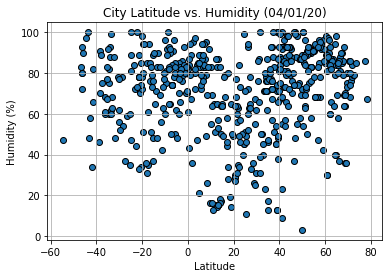

In [35]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_humi.png")
plt.show()


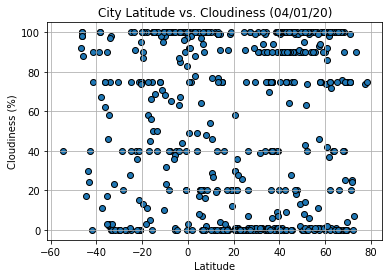

In [36]:
# Latitude vs. Cloudiness
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_cloud.png")
plt.show()


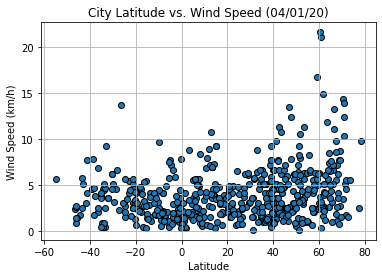

In [37]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.grid()
plt.savefig("Figures/lat_wind.png")
plt.show()


In [38]:
northern_hemi=weather_df.loc[weather_df['Lat']>0,:]
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paamiut,61.9940,-49.6678,-1.46,85,20,2.71,GL,1612724530
1,punta arenas,8.9897,125.3400,23.80,92,100,0.60,PH,1612724530
2,nanortalik,60.1432,-45.2371,-0.45,89,74,6.29,GL,1612724224
5,tuktoyaktuk,69.4541,-133.0374,-32.00,75,75,8.75,CA,1612724342
7,cedar city,41.2122,-92.5257,-18.00,55,90,3.09,US,1612724533


The r-squared is: 0.7329781181741652


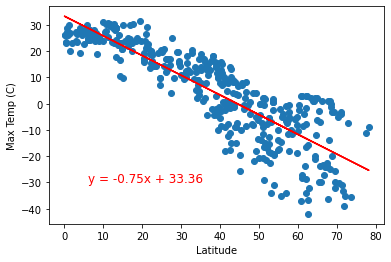

In [43]:
# Linear Regression
# Lat vs. Max Temp (NH)

x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-30),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [44]:
southern_hemi=weather_df.loc[weather_df['Lat']<0,:]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,mahebourg,-20.4081,57.7000,27.00,78,75,4.63,MU,1612724531
4,busselton,-33.6500,115.3333,17.22,99,98,0.45,AU,1612724532
6,bukama,-9.2000,25.8500,22.14,92,100,0.54,CD,1612724533
8,ushuaia,-54.8000,-68.3000,15.00,47,40,5.66,AR,1612724329
9,airai,-8.9266,125.4092,15.81,100,100,1.26,TL,1612723779


The r-squared is: 0.41590429316634364


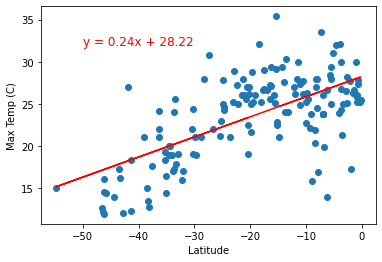

In [45]:
# Linear Regression
# Lat vs. Max Temp (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08834843115961315


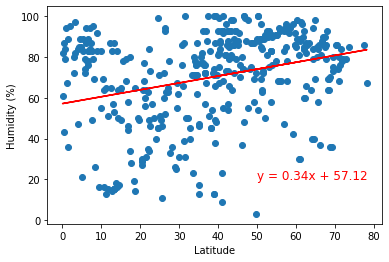

In [46]:
# Linear Regression
# Lat vs. Humidity (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012715448168445035


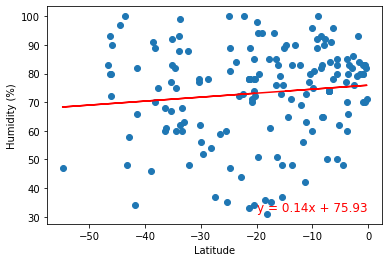

In [47]:
# Linear Regression
# Lat vs. Humidity (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.018100058366010075


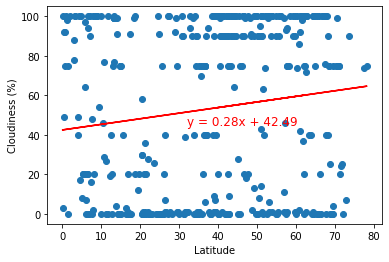

In [48]:
# Linear Regression
# Lat vs. Cloudiness (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,45),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.050451783900086984


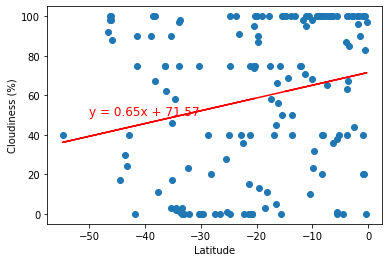

In [49]:
# Linear Regression
# Lat vs. Cloudiness (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06906390540782824


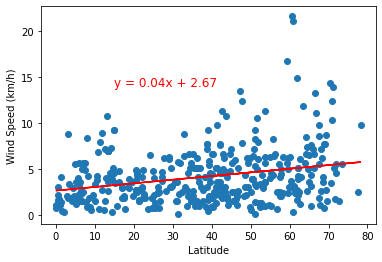

In [50]:
# Linear Regression
# Lat vs. Wind Speed (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,14),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02913382869500434


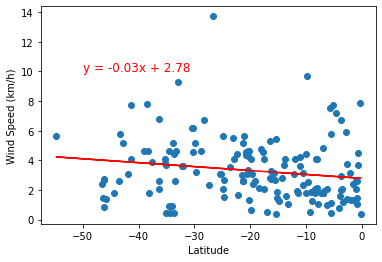

In [51]:
# Linear Regression
# Lat vs. Wind Speed (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
print(f"The r-squared is: {rvalue**2}")
plt.show()